# Read csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/zoujingyi/Desktop/EDA/HI-Small_Trans.csv')

In [6]:
len(df[df['Is Laundering'] == 1])

5177

In [7]:
len(df)

5078345

In [8]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


# Baisc Info & Duplicates

In [9]:
# Display basic information
print("Basic Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB

Summary Statistics:
          From Bank       To Bank  Amount Received   Amount Paid   
count  5.078345e+06  5.078345e+06     5.078345e+06  5.078345e+06  \
mean   4.573057e+04  6.574456e+04     5.988726e+06  4.509273e+06   
std    8.176562e+04  8.409299e+04     1.037183e+09  8.697728e+08   
min    1.000000e+00  1.000000e+00     1.000000e-06  1.000000e-06   
25%    1.19000

# Balance?

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/2645705694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Is Laundering'], palette='viridis')


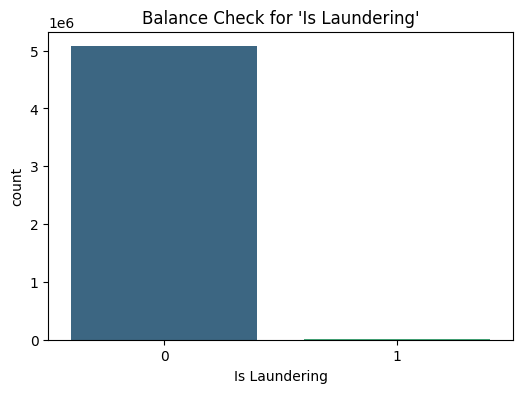


Balance Check for 'Is Laundering':
Is Laundering
0    0.998981
1    0.001019
Name: proportion, dtype: float64


In [10]:
# Check if dataset is balanced for 'Is Laundering'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Is Laundering'], palette='viridis')
plt.title("Balance Check for 'Is Laundering'")
plt.show()

print("\nBalance Check for 'Is Laundering':")
print(df['Is Laundering'].value_counts(normalize=True))

# Each Col Analysis

## Day


Transaction Count per Weekday:
Weekday
Thursday     1597736
Friday       1408958
Monday        482931
Wednesday     482871
Tuesday       482273
Saturday      415730
Sunday        207837
Name: count, dtype: int64


/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/486121281.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Weekday'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='viridis')


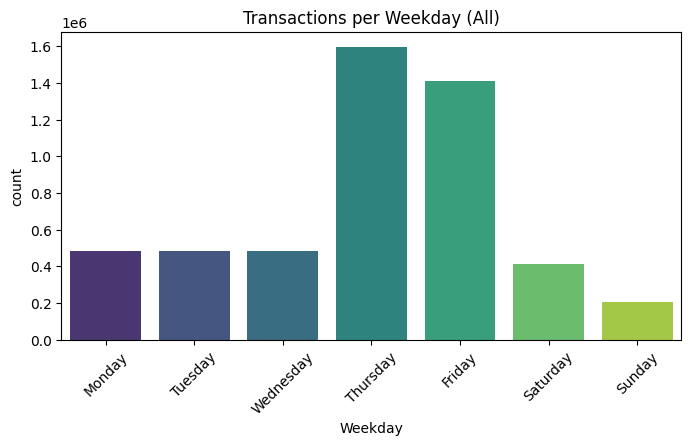

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/486121281.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['Weekday'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='viridis')


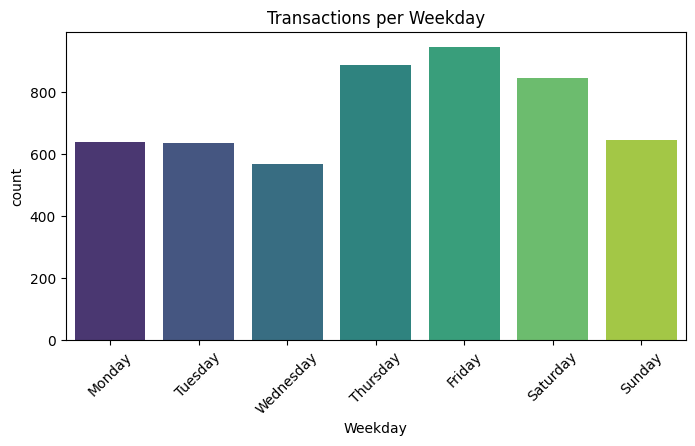

In [11]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Weekday'] = df['Timestamp'].dt.day_name()

# Count of transactions per weekday
weekday_counts = df['Weekday'].value_counts()
print("\nTransaction Count per Weekday:")
print(weekday_counts)

# Count plot for each weekday
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Weekday'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='viridis')
plt.title("Transactions per Weekday (All)")
plt.xticks(rotation=45)
plt.show()

######################

df1 = df[df['Is Laundering'] == 1]
# Count of transactions per weekday
weekday_counts = df1['Weekday'].value_counts()


# Count plot for each weekday
plt.figure(figsize=(8, 4))
sns.countplot(x=df1['Weekday'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='viridis')
plt.title("Transactions per Weekday")
plt.xticks(rotation=45)
plt.show()

### Chi-Square Test

In [13]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Weekday'], df['Is Laundering'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant relationship between Weekday and Is Laundering.")
else:
    print("No significant relationship found between Weekday and Is Laundering.")

Chi-Square Test Statistic: 1921.4076
P-value: 0.0000
There is a significant relationship between Weekday and Is Laundering.


## From Bank & To Bank

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/2908927441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['From Bank'].isin(top_banks)]['From Bank'],


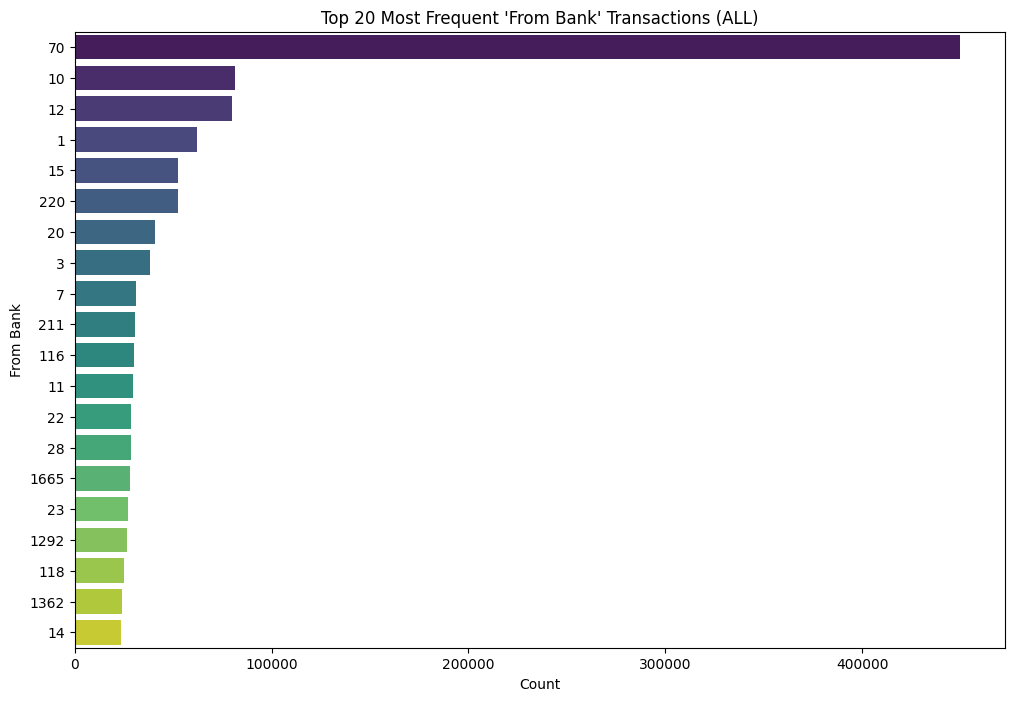

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/2908927441.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['To Bank'].isin(top_to_banks)]['To Bank'],


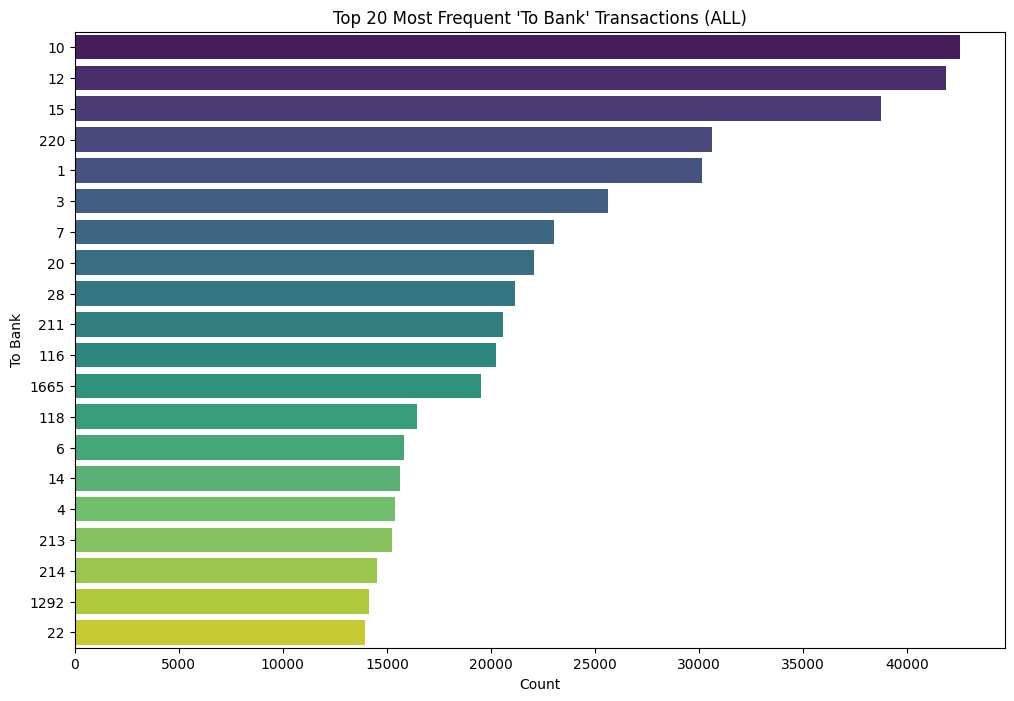

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/2908927441.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1[df1['From Bank'].isin(top_banks)]['From Bank'],


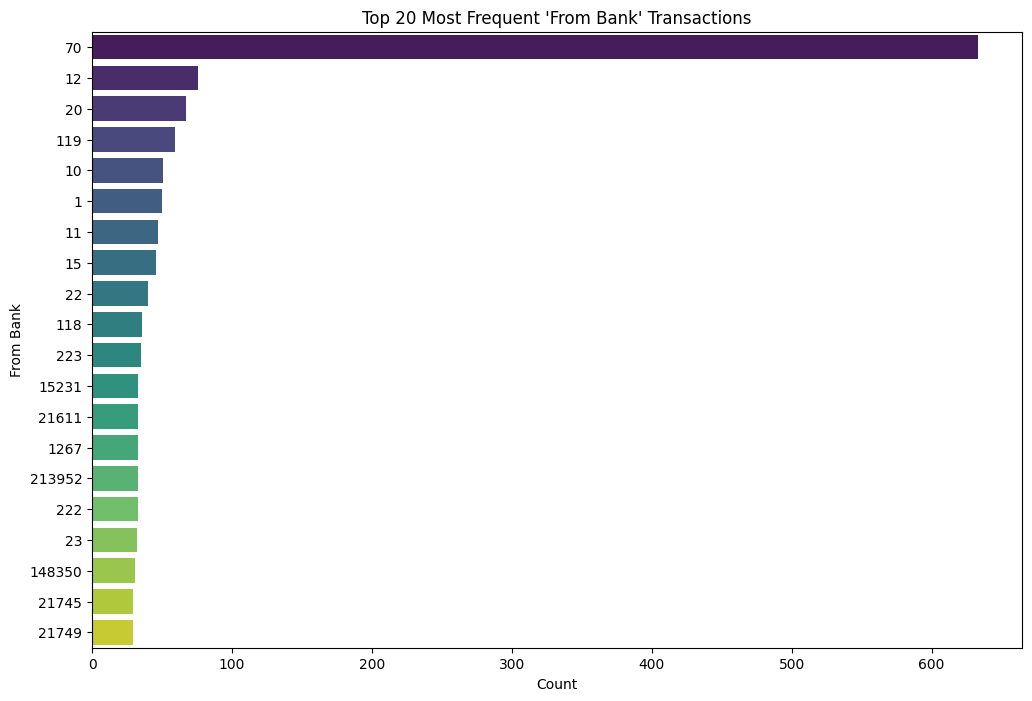

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/2908927441.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1[df1['To Bank'].isin(top_to_banks)]['To Bank'],


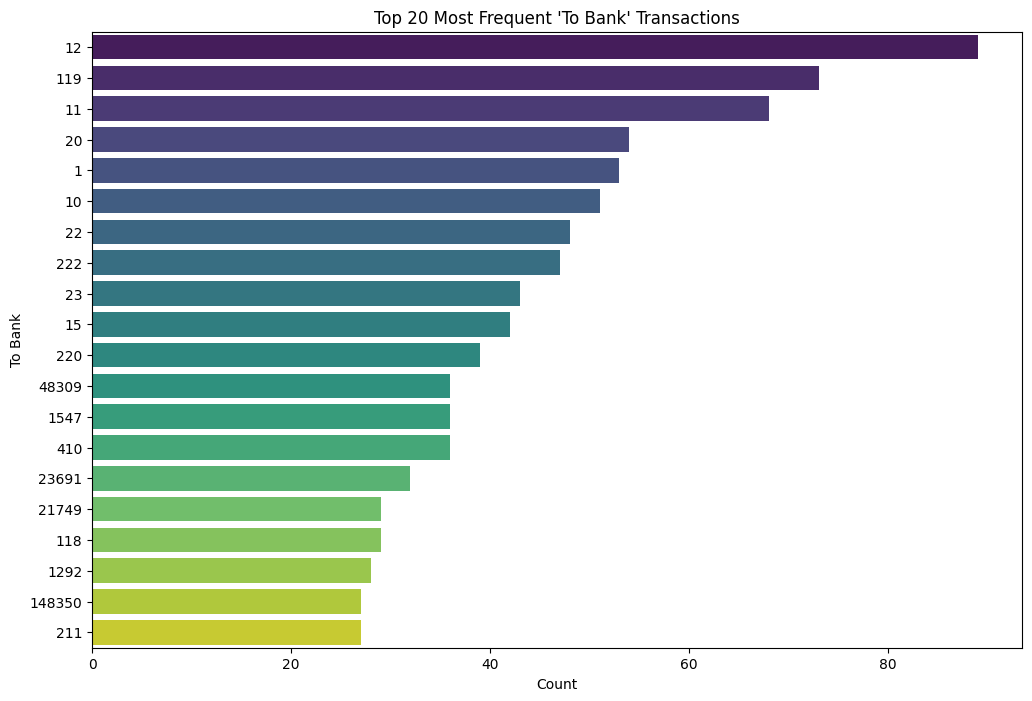

In [14]:
df['From Bank'] = df['From Bank'].astype('category')

df['To Bank'] = df['To Bank'].astype('category')

# Limit to top 20 most frequent banks for better readability
top_n = 20
top_banks = df['From Bank'].value_counts().nlargest(top_n).index

top_to_banks = df['To Bank'].value_counts().nlargest(top_n).index

plt.figure(figsize=(12, 8))
sns.countplot(y=df[df['From Bank'].isin(top_banks)]['From Bank'], 
              order=top_banks, 
              palette='viridis')

plt.title(f"Top {top_n} Most Frequent 'From Bank' Transactions (ALL)")
plt.xlabel("Count")
plt.ylabel("From Bank")
plt.show()

# Count plot for 'To Bank'
plt.figure(figsize=(12, 8))
sns.countplot(y=df[df['To Bank'].isin(top_to_banks)]['To Bank'], 
              order=top_to_banks, 
              palette='viridis')

plt.title(f"Top {top_n} Most Frequent 'To Bank' Transactions (ALL)")
plt.xlabel("Count")
plt.ylabel("To Bank")
plt.show()


################

# Limit to top 20 most frequent banks for better readability
top_n = 20
top_banks = df1['From Bank'].value_counts().nlargest(top_n).index

top_to_banks = df1['To Bank'].value_counts().nlargest(top_n).index

plt.figure(figsize=(12, 8))
sns.countplot(y=df1[df1['From Bank'].isin(top_banks)]['From Bank'], 
              order=top_banks, 
              palette='viridis')

plt.title(f"Top {top_n} Most Frequent 'From Bank' Transactions")
plt.xlabel("Count")
plt.ylabel("From Bank")
plt.show()

# Count plot for 'To Bank'
plt.figure(figsize=(12, 8))
sns.countplot(y=df1[df1['To Bank'].isin(top_to_banks)]['To Bank'], 
              order=top_to_banks, 
              palette='viridis')

plt.title(f"Top {top_n} Most Frequent 'To Bank' Transactions")
plt.xlabel("Count")
plt.ylabel("To Bank")
plt.show()

### Chi-square Test

In [15]:
# Chi-Square test for 'From Bank'
contingency_from_bank = pd.crosstab(df['From Bank'], df['Is Laundering'])
chi2_from, p_from, _, _ = stats.chi2_contingency(contingency_from_bank)

print(f"Chi-Square Test for From Bank:\nChi-Square Statistic: {chi2_from:.4f}, P-value: {p_from:.4f}")
if p_from < 0.05:
    print("Significant relationship found between From Bank and Is Laundering.")
else:
    print("No significant relationship found between From Bank and Is Laundering.")

# Chi-Square test for 'To Bank'
contingency_to_bank = pd.crosstab(df['To Bank'], df['Is Laundering'])
chi2_to, p_to, _, _ = stats.chi2_contingency(contingency_to_bank)

print(f"\nChi-Square Test for To Bank:\nChi-Square Statistic: {chi2_to:.4f}, P-value: {p_to:.4f}")
if p_to < 0.05:
    print("Significant relationship found between To Bank and Is Laundering.")
else:
    print("No significant relationship found between To Bank and Is Laundering.")


Chi-Square Test for From Bank:
Chi-Square Statistic: 17376.1925, P-value: 1.0000
No significant relationship found between From Bank and Is Laundering.

Chi-Square Test for To Bank:
Chi-Square Statistic: 6623.2778, P-value: 1.0000
No significant relationship found between To Bank and Is Laundering.


## Currency

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/3429673762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Receiving Currency'], order=df['Receiving Currency'].value_counts().index, palette='viridis')


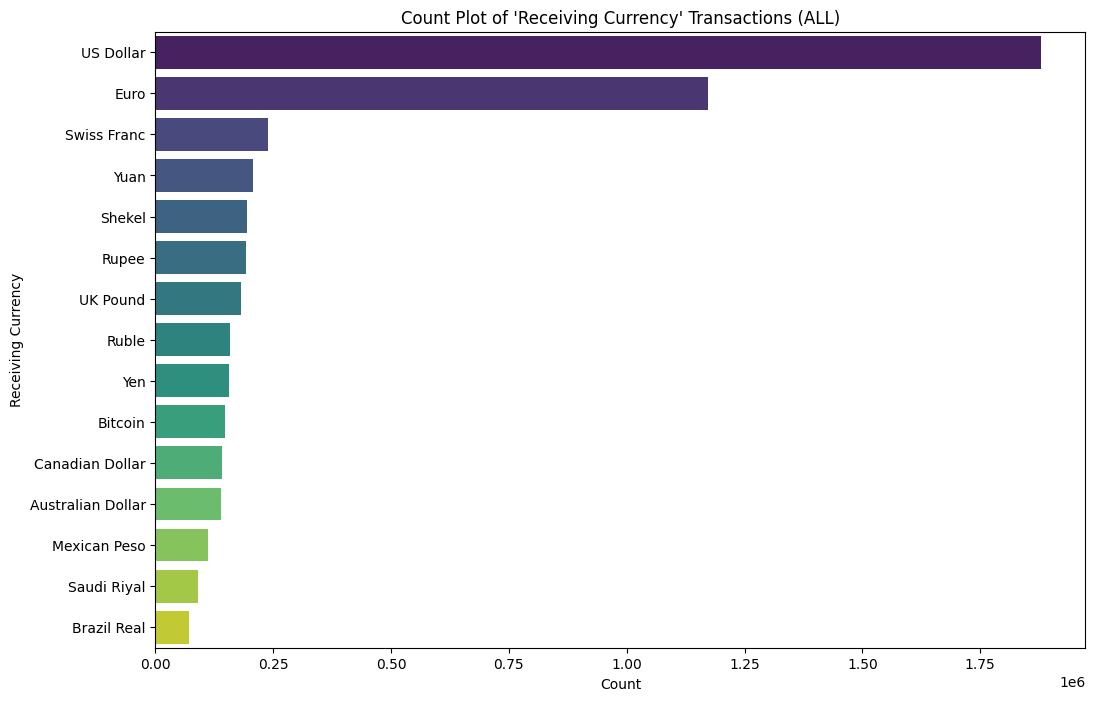

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/3429673762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Receiving Currency'] = df1['Receiving Currency'].astype('category')
/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/3429673762.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['Receiving Currency'], order=df1['Receiving Currency'].value_counts().index, palette='viridis')


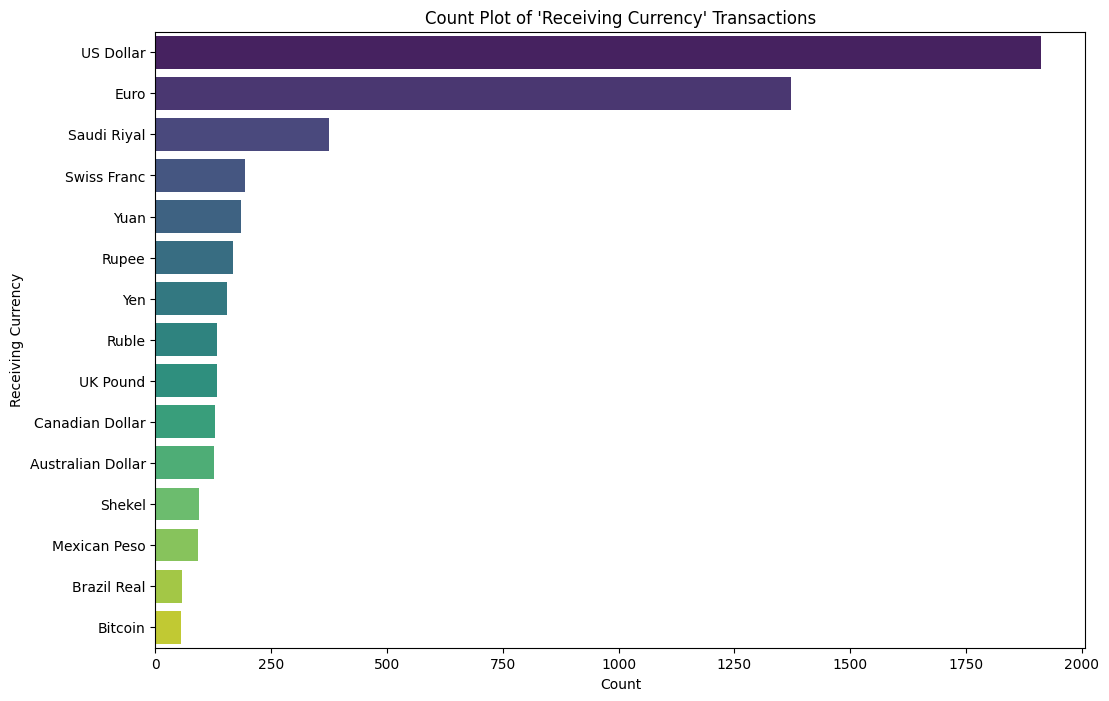

In [18]:
df['Receiving Currency'] = df['Receiving Currency'].astype('category')

# Count plot for 'Receiving Currency' ranked by counts
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Receiving Currency'], order=df['Receiving Currency'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Receiving Currency' Transactions (ALL)")
plt.xlabel("Count")
plt.ylabel("Receiving Currency")
plt.show()

#-----------------------------------
df1['Receiving Currency'] = df1['Receiving Currency'].astype('category')

# Count plot for 'Receiving Currency' ranked by counts
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Receiving Currency'], order=df1['Receiving Currency'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Receiving Currency' Transactions")
plt.xlabel("Count")
plt.ylabel("Receiving Currency")
plt.show()

### Chi-square Test

In [20]:
# Chi-Square test for 'Receiving Currency'
contingency_receiving = pd.crosstab(df['Receiving Currency'], df['Is Laundering'])
chi2_receiving, p_receiving, _, _ = stats.chi2_contingency(contingency_receiving)

print(f"Chi-Square Test for Receiving Currency:\nChi-Square Statistic: {chi2_receiving:.4f}, P-value: {p_receiving:.4f}")
if p_receiving < 0.05:
    print("Significant relationship found between Receiving Currency and Is Laundering.")
else:
    print("No significant relationship found between Receiving Currency and Is Laundering.")

# Chi-Square test for 'Payment Currency'
contingency_payment = pd.crosstab(df['Payment Currency'], df['Is Laundering'])
chi2_payment, p_payment, _, _ = stats.chi2_contingency(contingency_payment)

print(f"\nChi-Square Test for Payment Currency:\nChi-Square Statistic: {chi2_payment:.4f}, P-value: {p_payment:.4f}")
if p_payment < 0.05:
    print("Significant relationship found between Payment Currency and Is Laundering.")
else:
    print("No significant relationship found between Payment Currency and Is Laundering.")


Chi-Square Test for Receiving Currency:
Chi-Square Statistic: 1058.3514, P-value: 0.0000
Significant relationship found between Receiving Currency and Is Laundering.

Chi-Square Test for Payment Currency:
Chi-Square Statistic: 1069.2973, P-value: 0.0000
Significant relationship found between Payment Currency and Is Laundering.


### Causal Effect Investigation - PSM

In [23]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Step 1: Prepare data
df = df.dropna(subset=['Receiving Currency', 'Is Laundering'])  # Drop missing values
df['Receiving Currency'] = df['Receiving Currency'].astype('category').cat.codes  # Convert to numeric

# Select covariates (potential confounders)
covariates = ['Amount Received', 'Amount Paid', 'To Bank', 'From Bank']
X = df[covariates]
y = df['Receiving Currency']  # Treatment variable

# Step 2: Estimate propensity scores
propensity_model = LogisticRegression()
propensity_model.fit(X, y)
df['Propensity Score'] = propensity_model.predict_proba(X)[:, 1]

# Step 3: Match treated and control units
treated = df[df['Receiving Currency'] == 1]
control = df[df['Receiving Currency'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['Propensity Score']])
distances, indices = nn.kneighbors(treated[['Propensity Score']])

matched_control = control.iloc[indices.flatten()]
matched_df = pd.concat([treated, matched_control])

# Step 4: Estimate causal effect
causal_model = sm.Logit(matched_df['Is Laundering'], sm.add_constant(matched_df['Receiving Currency'])).fit()
print(causal_model.summary())

/Users/zoujingyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.002895
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:          Is Laundering   No. Observations:               296284
Model:                          Logit   Df Residuals:                   296282
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                0.001780
Time:                        20:41:22   Log-Likelihood:                -857.75
converged:                       True   LL-Null:                       -859.28
Covariance Type:            nonrobust   LLR p-value:                   0.08026
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.2421      0.160    -51.465      0.000      -8.556      -7.928
Rece

* p-value = 0.083:
Since p > 0.05, we fail to reject the null hypothesis, meaning there is no strong evidence that receiving currency influences money laundering.

## Payment Format

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/4272733419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Payment Format'], order=df['Payment Format'].value_counts().index, palette='viridis')


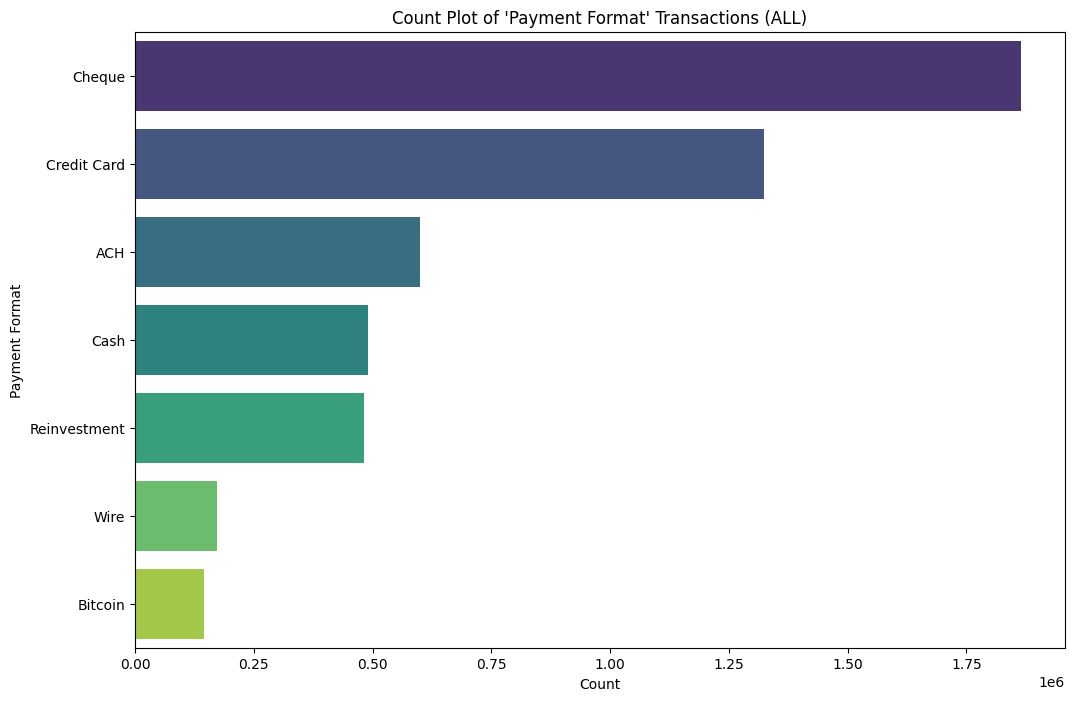

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/4272733419.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['Payment Format'], order=df1['Payment Format'].value_counts().index, palette='viridis')


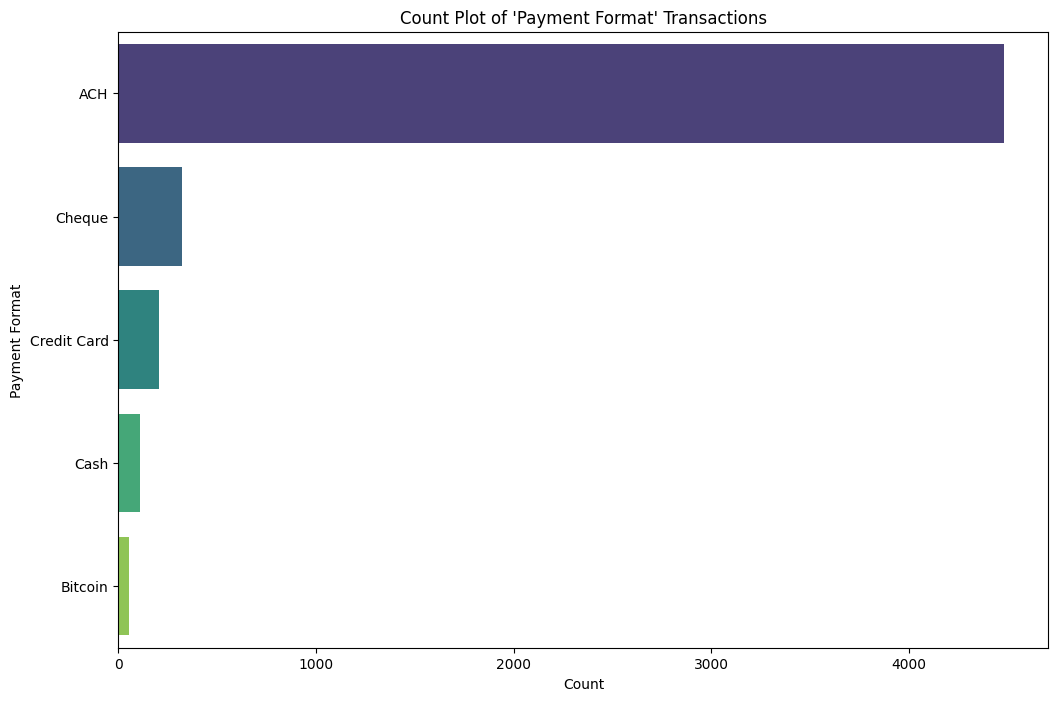

In [25]:
df['Payment Format'] = df['Payment Format'].astype('category')
# Count plot for 'Payment Format' ranked by counts
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Payment Format'], order=df['Payment Format'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Payment Format' Transactions (ALL)")
plt.xlabel("Count")
plt.ylabel("Payment Format")
plt.show()

#------------------------------------
df1['Payment Format'] = df1['Payment Format'].astype('category')
# Count plot for 'Payment Format' ranked by counts
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Payment Format'], order=df1['Payment Format'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Payment Format' Transactions")
plt.xlabel("Count")
plt.ylabel("Payment Format")
plt.show()

### Chi-square

In [27]:
# Chi-Square test for 'Payment Currency'
contingency_payment = pd.crosstab(df['Payment Currency'], df['Is Laundering'])
chi2_payment, p_payment, _, _ = stats.chi2_contingency(contingency_payment)

print(f"Chi-Square Test for Payment Currency:")
print(f"Chi-Square Statistic: {chi2_payment:.4f}")
print(f"P-value: {p_payment:.4f}")

if p_payment < 0.05:
    print("Significant relationship found between Payment Currency and Is Laundering.")
else:
    print("No significant relationship found between Payment Currency and Is Laundering.")

Chi-Square Test for Payment Currency:
Chi-Square Statistic: 1069.2973
P-value: 0.0000
Significant relationship found between Payment Currency and Is Laundering.


## Amount

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/1197618731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Amount Received Category'], order=df['Amount Received Category'].value_counts().index, palette='viridis')


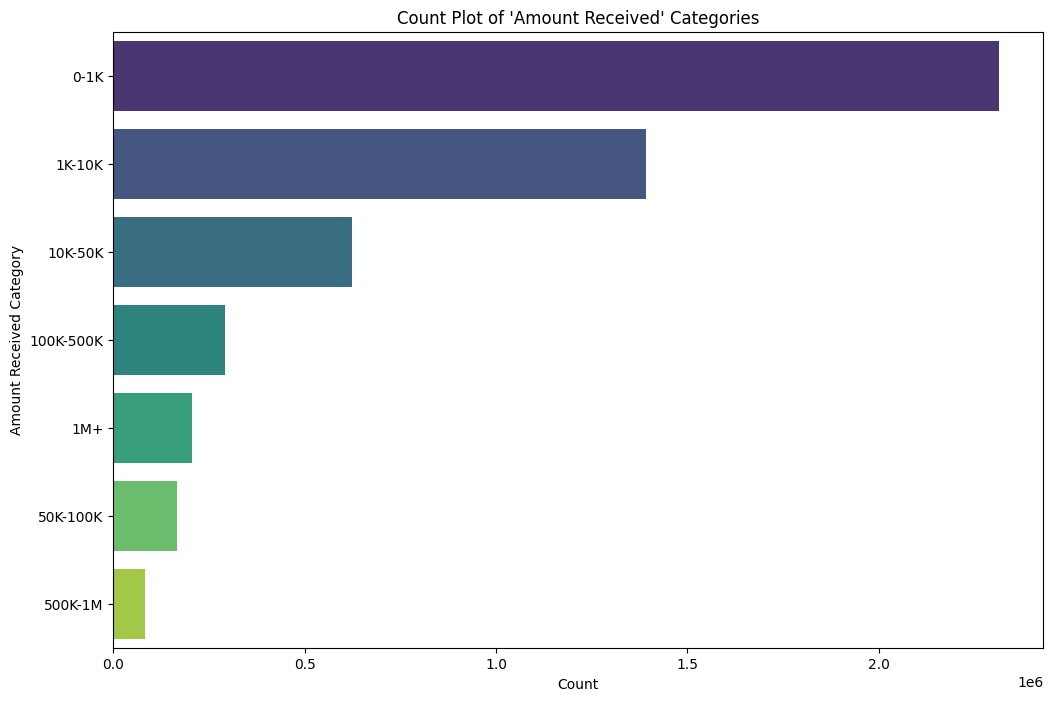

/var/folders/4z/4lgchhkd1154cdlhyxr67nn80000gn/T/ipykernel_64636/1197618731.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['Amount Received Category'], order=df1['Amount Received Category'].value_counts().index, palette='viridis')


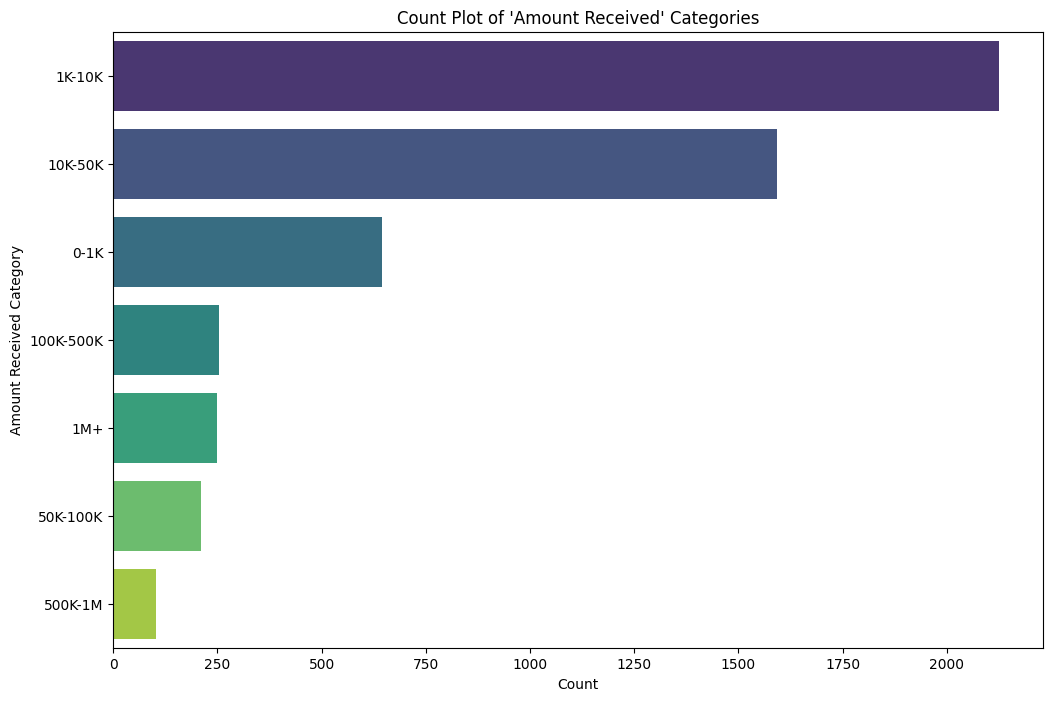

In [28]:
# Binning 'Amount Received' into categories
bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, df['Amount Received'].max()]
bin_labels = ['0-1K', '1K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
df['Amount Received Category'] = pd.cut(df['Amount Received'], bins=bins, labels=bin_labels)
# Count plot for 'Amount Received' categories
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Amount Received Category'], order=df['Amount Received Category'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Amount Received' Categories")
plt.xlabel("Count")
plt.ylabel("Amount Received Category")
plt.show()

#-------------------------------------------------------

# Binning 'Amount Received' into categories
bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, df1['Amount Received'].max()]
bin_labels = ['0-1K', '1K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
df1['Amount Received Category'] = pd.cut(df1['Amount Received'], bins=bins, labels=bin_labels)
# Count plot for 'Amount Received' categories
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Amount Received Category'], order=df1['Amount Received Category'].value_counts().index, palette='viridis')

plt.title("Count Plot of 'Amount Received' Categories")
plt.xlabel("Count")
plt.ylabel("Amount Received Category")
plt.show()


### Chi-square & PSM

In [ ]:
# Chi-Square test for 'Amount Received'
contingency_amount = pd.crosstab(pd.cut(df['Amount Received'], bins=5), df['Is Laundering'])
chi2_amount, p_amount, _, _ = stats.chi2_contingency(contingency_amount)

print(f"Chi-Square Test for Amount Received:")
print(f"Chi-Square Statistic: {chi2_amount:.4f}")
print(f"P-value: {p_amount:.4f}")

if p_amount < 0.05:
    print("Significant relationship found between Amount Received and Is Laundering.")
else:
    print("No significant relationship found between Amount Received and Is Laundering.")

# Propensity Score Matching (PSM) for Amount Received
# Drop missing values and encode categorical variables
df = df.dropna(subset=['Amount Received', 'Is Laundering'])

# Select covariates (potential confounders)
covariates = ['To Bank', 'From Bank', 'Payment Currency', 'Receiving Currency']
df = pd.get_dummies(df, columns=covariates, drop_first=True)
X = df.drop(columns=['Is Laundering'])
y = df['Is Laundering']

# Estimate propensity scores
propensity_model = LogisticRegression()
propensity_model.fit(X, y)
df['Propensity Score'] = propensity_model.predict_proba(X)[:, 1]

# Match treated and control units
treated = df[df['Is Laundering'] == 1]
control = df[df['Is Laundering'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['Propensity Score']])
distances, indices = nn.kneighbors(treated[['Propensity Score']])

matched_control = control.iloc[indices.flatten()]
matched_df = pd.concat([treated, matched_control])

# Estimate causal effect using logistic regression
causal_model = sm.Logit(matched_df['Is Laundering'], sm.add_constant(matched_df['Amount Received'])).fit()
print(causal_model.summary())

Chi-Square Test for Amount Received:
Chi-Square Statistic: 0.0122
P-value: 0.9996
No significant relationship found between Amount Received and Is Laundering.


# Node Set

In [22]:
# Extract unique account numbers as nodes
accounts = pd.concat([df['Account'], df['Account.1']]).unique()
nodes_df = pd.DataFrame({'Account': accounts})

# Save nodes to CSV
nodes_df.to_csv('/Users/zoujingyi/Desktop/EDA/nodes.csv', index=False)

In [23]:
nodes_df.head()

,Account
0,10042B660
1,815630C40
2,81A1C7C80
3,10042B6A8
4,10042B6F0


## Edge Set

In [29]:
# Create edge set
edges_df = df[['Account', 'Account.1', 'Timestamp', 'Amount Received']].copy()
edges_df.columns = ['Source', 'Target', 'Interval', 'Weight']
edges_df['Type'] = 'Directed'

# Convert Timestamp to interval (assuming intervals are relative to the first transaction)
edges_df['Interval'] = (pd.to_datetime(edges_df['Interval']) - pd.to_datetime(edges_df['Interval']).min()).dt.total_seconds() / 60

# Save edges to CSV
edges_df.to_csv('/Users/zoujingyi/Desktop/EDA/edges.csv', index=False)

# Network Graph

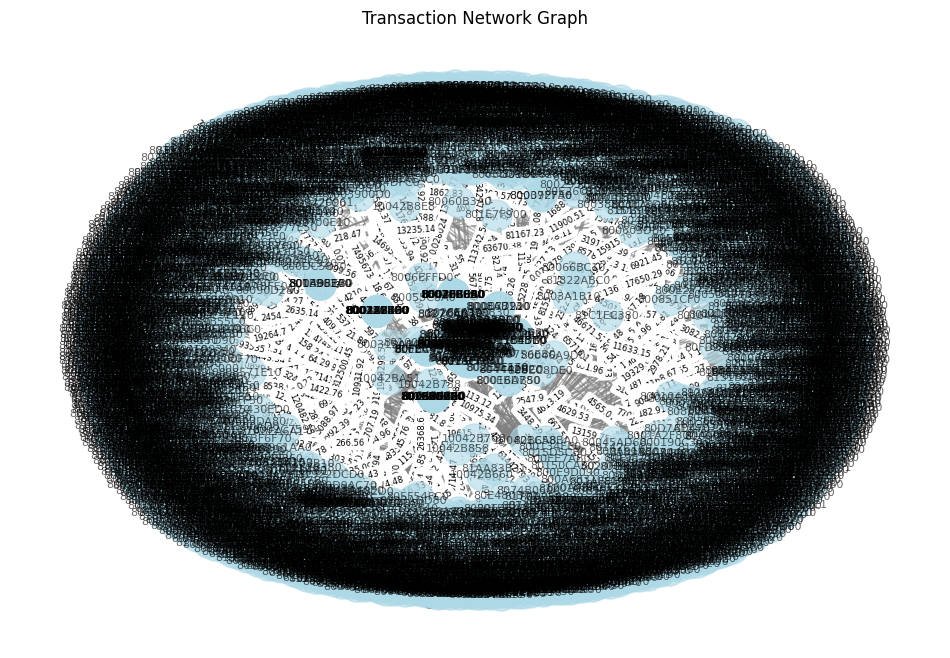

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Load nodes and edges
df_nodes = pd.read_csv('/Users/zoujingyi/Desktop/EDA/nodes.csv')
df_edges = pd.read_csv('/Users/zoujingyi/Desktop/EDA/edges.csv')

In [52]:
df_edges.head()

,Source,Target,Interval,Weight,Type
0,10042B660,805F7F2B0,2.0,70831.64,Directed
1,10042B660,80609B4C0,19.0,33705.47,Directed
2,10042B660,807861770,1.0,1097976.27,Directed
3,815630C40,815635220,0.0,892.33,Directed
4,10042B660,816F93AF0,25.0,1808.14,Directed


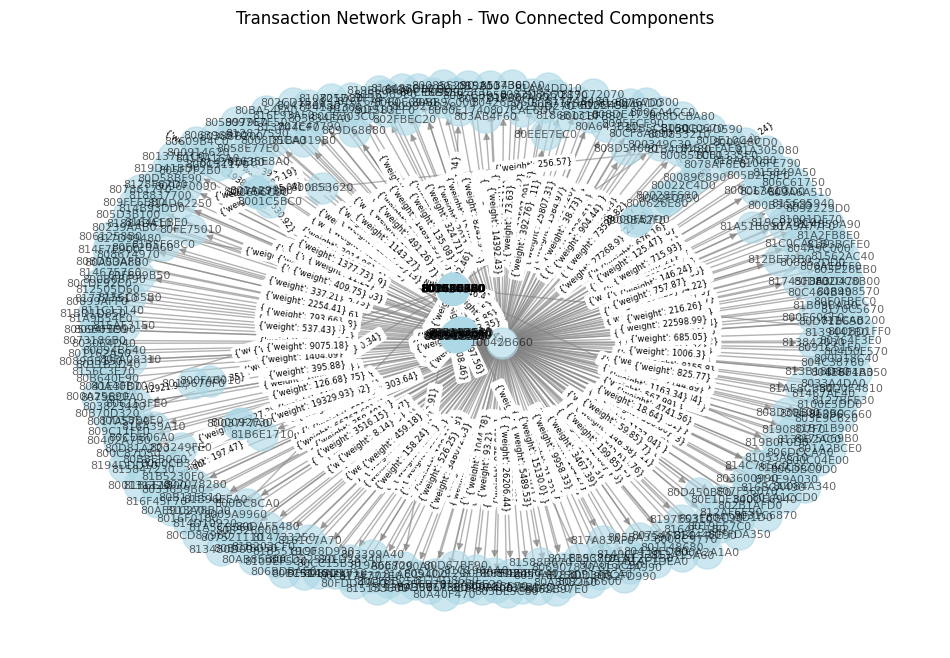

In [39]:
# Create graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df_nodes['Account'])

# Add edges
edges = [(row['Source'], row['Target'], row['Weight']) for _, row in df_edges.iterrows()]
G.add_weighted_edges_from(edges)

# Extract connected components
components = list(nx.weakly_connected_components(G))
selected_components = components[:1]  # Select only two connected components

# Create subgraph with selected components
subgraph_nodes = set().union(*selected_components)
G_sub = G.subgraph(subgraph_nodes)

# Plot the network graph with selected components
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', alpha=0.6, font_size=8, ax=ax)
edge_labels = {(row['Source'], row['Target']): f"{row['Weight']}" for _, row in df_edges.iterrows() if row['Source'] in subgraph_nodes and row['Target'] in subgraph_nodes}
nx.draw_networkx_edge_labels(G_sub, pos,font_size=6, ax=ax)

plt.title("Transaction Network Graph - One Connected Components")
plt.show()


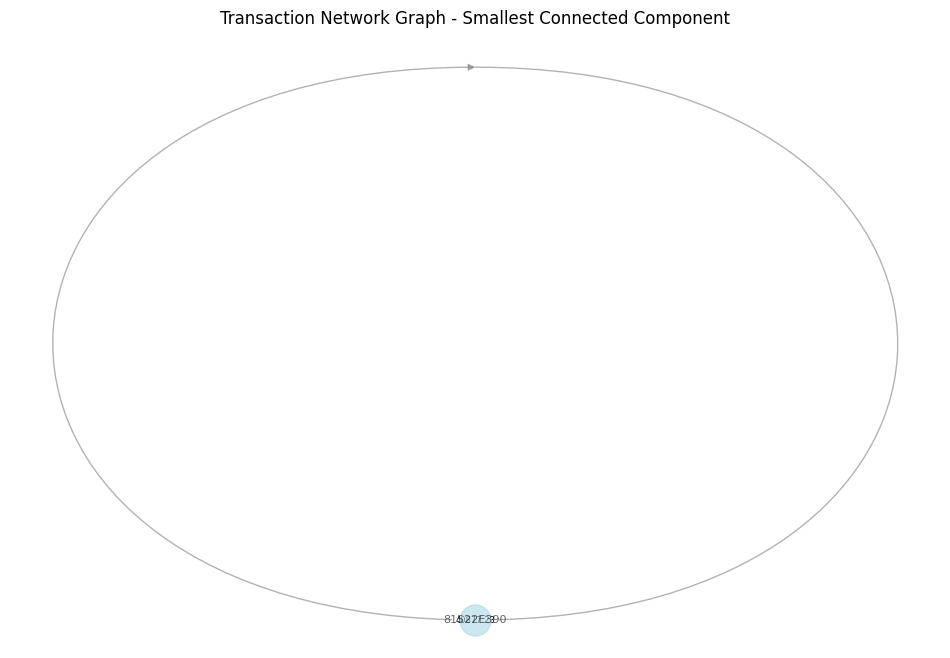

In [46]:
# Create graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df_nodes['Account'])

# Add edges
edges = [(row['Source'], row['Target'], row['Weight']) for _, row in df_edges.iterrows()]
G.add_weighted_edges_from(edges)

# Extract connected components and choose the smallest one
components = list(nx.weakly_connected_components(G))
smallest_component = min(components, key=len)

# Create subgraph with the smallest connected component
G_sub = G.subgraph(smallest_component)

# Plot the network graph with the smallest connected component
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', alpha=0.6, font_size=8, ax=ax)
edge_labels = {(row['Source'], row['Target']): f"{row['Weight']}" for _, row in df_edges.iterrows() if row['Source'] in smallest_component and row['Target'] in smallest_component}
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, font_size=6, ax=ax)

plt.title("Transaction Network Graph - Smallest Connected Component")
plt.show()

Number of rows in df_nodes: 5304
Number of rows in df_edges: 3565


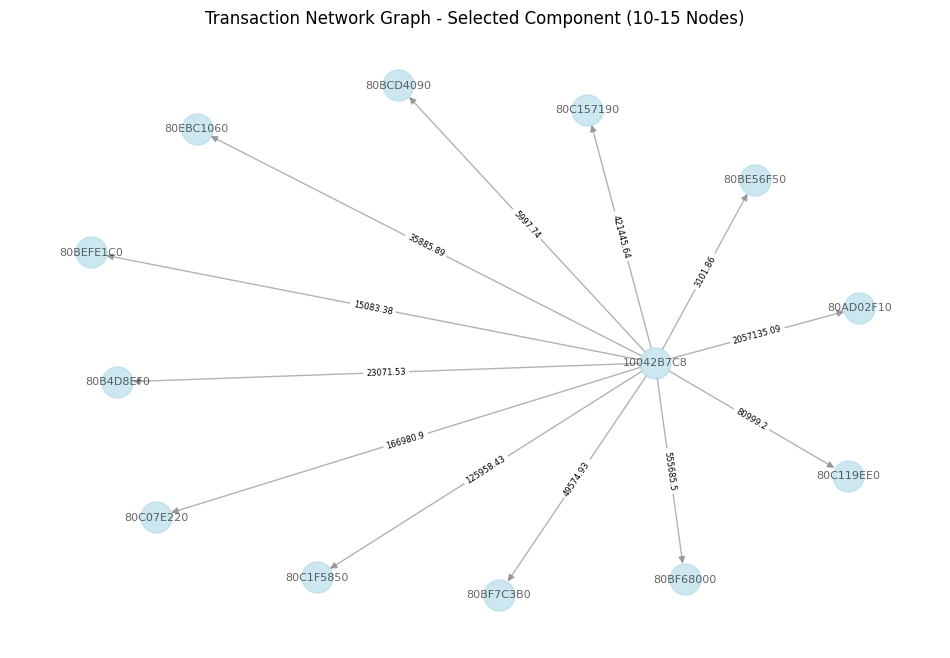

In [48]:
# Print number of rows
print(f"Number of rows in df_nodes: {len(df_nodes)}")
print(f"Number of rows in df_edges: {len(df_edges)}")

# Create graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df_nodes['Account'])

# Add edges
edges = [(row['Source'], row['Target'], row['Weight']) for _, row in df_edges.iterrows()]
G.add_weighted_edges_from(edges)

# Extract connected components and find one with 10-15 nodes
components = list(nx.weakly_connected_components(G))
selected_component = next((comp for comp in components if 10 <= len(comp) <= 15), None)

if selected_component:
    # Create subgraph with selected component
    G_sub = G.subgraph(selected_component)

    # Plot the network graph with selected component
    fig, ax = plt.subplots(figsize=(12, 8))
    pos = nx.spring_layout(G_sub, seed=42)
    nx.draw(G_sub, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', alpha=0.6, font_size=8, ax=ax)
    edge_labels = {(row['Source'], row['Target']): f"{row['Weight']}" for _, row in df_edges.iterrows() if row['Source'] in selected_component and row['Target'] in selected_component}
    nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, font_size=6, ax=ax)

    plt.title("Transaction Network Graph - Selected Component (10-15 Nodes)")
    plt.show()
else:
    print("No connected component with 10-15 nodes found.")


# Some STATs

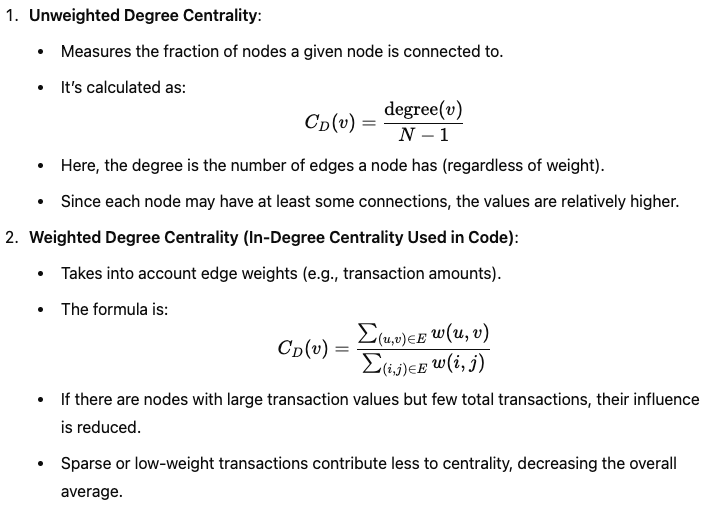

In [59]:
 # Compute network statistics
avg_degree_centrality = sum(nx.degree_centrality(G).values())
avg_weighted_degree_centrality = sum(nx.in_degree_centrality(G).values())
num_connected_components = nx.number_weakly_connected_components(G)

print(f"Average Degree Centrality (Unweighted): {avg_degree_centrality}")
print(f"Average Degree Centrality (Weighted): {avg_weighted_degree_centrality}")
print(f"Number of Connected Components: {num_connected_components}")

Average Degree Centrality (Unweighted): 1.3260418630962414
Average Degree Centrality (Weighted): 0.6630209315481309
Number of Connected Components: 1902


# XGboosting - Classification

## Without Feature engineering

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare dataset for XGBoost
df = df.dropna(subset=['Is Laundering'])  # Drop missing target values

# Select features and target variable
X = df.drop(columns=['Is Laundering'])
y = df['Is Laundering']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train XGBoost model
num_round = 100
evals = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(params, dtrain, num_round, evals, early_stopping_rounds=10, verbose_eval=True)

# Predict and evaluate
preds = model.predict(dtest)
pred_labels = (preds > 0.5).astype(int)

accuracy = accuracy_score(y_test, pred_labels)
auc = roc_auc_score(y_test, preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")